<a href="https://colab.research.google.com/github/TheCaveOfAdullam/study1/blob/main/marchine5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Set the directory path
base_path = '/content/drive/MyDrive/marine_data'
os.chdir(base_path)

In [ ]:
# Function to resize images
def resize_img(img, size):
    return img.resize(size)

# Function to load and resize images from a directory
def load_img(file_path):
    data = []
    full_path = os.path.join(base_path, file_path)
    for f in os.listdir(full_path):
        data.append(resize_img(Image.open(os.path.join(full_path, f)), (64, 64)))
    return data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load images for different sets
train_normal = load_img('train/normal')
test_normal = load_img('test/normal')
val_normal = load_img('validation/normal')

train_fault_BB = load_img('train/fault_BB')
test_fault_BB = load_img('test/fault_BB')
val_fault_BB = load_img('validation/fault_BB')

train_fault_SM = load_img('train/fault_SM')
test_fault_SM = load_img('test/fault_SM')
val_fault_SM = load_img('validation/fault_SM')

train_fault_RI = load_img('train/fault_RI')
test_fault_RI = load_img('test/fault_RI')
val_fault_RI = load_img('validation/fault_RI')

In [ ]:
# Print the lengths of the datasets
print(len(train_normal), len(test_normal), len(val_normal))
print(len(train_fault_BB), len(test_fault_BB), len(val_fault_BB))
print(len(train_fault_SM), len(test_fault_SM), len(val_fault_SM))
print(len(train_fault_RI), len(test_fault_RI), len(val_fault_RI))

3000 3000 1500
3004 3000 1500
3000 3000 1500
3000 3000 1500


In [ ]:
# Function to convert images to arrays and normalize
def img_to_array(img):
    return np.array(img, dtype='float32') / 255.0

In [ ]:
# Convert images to arrays and define labels
train_normal_arr = np.array([img_to_array(normal) for normal in train_normal])
test_normal_arr = np.array([img_to_array(normal) for normal in test_normal])
val_normal_arr = np.array([img_to_array(normal) for normal in val_normal])

train_fault_BB_arr = np.array([img_to_array(fault) for fault in train_fault_BB])
test_fault_BB_arr = np.array([img_to_array(fault) for fault in test_fault_BB])
val_fault_BB_arr = np.array([img_to_array(fault) for fault in val_fault_BB])

train_fault_SM_arr = np.array([img_to_array(fault) for fault in train_fault_SM])
test_fault_SM_arr = np.array([img_to_array(fault) for fault in test_fault_SM])
val_fault_SM_arr = np.array([img_to_array(fault) for fault in val_fault_SM])

train_fault_RI_arr = np.array([img_to_array(fault) for fault in train_fault_RI])
test_fault_RI_arr = np.array([img_to_array(fault) for fault in test_fault_RI])
val_fault_RI_arr = np.array([img_to_array(fault) for fault in val_fault_RI])

train_normal_sol = np.array([0] * len(train_normal))
test_normal_sol = np.array([0] * len(test_normal))
val_normal_sol = np.array([0] * len(val_normal))

train_fault_BB_sol = np.array([1] * len(train_fault_BB))
test_fault_BB_sol = np.array([1] * len(test_fault_BB))
val_fault_BB_sol = np.array([1] * len(val_fault_BB))

train_fault_SM_sol = np.array([2] * len(train_fault_SM))
test_fault_SM_sol = np.array([2] * len(test_fault_SM))
val_fault_SM_sol = np.array([2] * len(val_fault_SM))

train_fault_RI_sol = np.array([3] * len(train_fault_RI))
test_fault_RI_sol = np.array([3] * len(test_fault_RI))
val_fault_RI_sol = np.array([3] * len(val_fault_RI))

# Combine data and labels
train_img = np.concatenate((train_normal_arr, train_fault_BB_arr, train_fault_SM_arr, train_fault_RI_arr))
train_sol = np.concatenate((train_normal_sol, train_fault_BB_sol, train_fault_SM_sol, train_fault_RI_sol))

test_img = np.concatenate((test_normal_arr, test_fault_BB_arr, test_fault_SM_arr, test_fault_RI_arr))
test_sol = np.concatenate((test_normal_sol, test_fault_BB_sol, test_fault_SM_sol, test_fault_RI_sol))

val_img = np.concatenate((val_normal_arr, val_fault_BB_arr, val_fault_SM_arr, val_fault_RI_arr))
val_sol = np.concatenate((val_normal_sol, val_fault_BB_sol, val_fault_SM_sol, val_fault_RI_sol))

In [ ]:
# One-hot encode the labels
train_sol = to_categorical(train_sol, 4)
test_sol = to_categorical(test_sol, 4)
val_sol = to_categorical(val_sol, 4)

In [ ]:
# Build the model
model = Sequential()

In [ ]:
# First block
model.add(BatchNormalization(input_shape=train_img.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Second block
model.add(BatchNormalization())
model.add(Conv2D(128, (5, 5), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third block
model.add(BatchNormalization())
model.add(Conv2D(256, (5, 5), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='elu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(x=train_img, y=train_sol, batch_size=128, epochs=30, verbose=1, validation_data=(val_img, val_sol))

Epoch 1/30
94/94 [==============================] - 951s 10s/step - loss: 0.5298 - accuracy: 0.9611 - val_loss: 14.4700 - val_accuracy: 0.4992
Epoch 2/30
94/94 [==============================] - 987s 11s/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 2.0002e-06 - val_accuracy: 1.0000
Epoch 3/30
94/94 [==============================] - 1012s 11s/step - loss: 0.0045 - accuracy: 0.9998 - val_loss: 7.4109e-04 - val_accuracy: 0.9997
Epoch 4/30
94/94 [==============================] - 991s 11s/step - loss: 0.0047 - accuracy: 0.9993 - val_loss: 0.0055 - val_accuracy: 0.9995
Epoch 5/30
94/94 [==============================] - 1009s 11s/step - loss: 0.0255 - accuracy: 0.9984 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
94/94 [==============================] - 999s 11s/step - loss: 0.0055 - accuracy: 0.9997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
94/94 [==============================] - 996s 11s/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0000e+00 - val_

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(test_img, test_sol, batch_size=128)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

94/94 [==============================] - 236s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Loss: 0.0
Test Accuracy: 1.0


In [ ]:
# Predict the labels
test_pred = model.predict(test_img)
test_pred_classes = np.argmax(test_pred, axis=1)
test_true_classes = np.argmax(test_sol, axis=1)

375/375 [==============================] - 231s 614ms/step


In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(test_true_classes, test_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3000    0    0    0]
 [   0 3000    0    0]
 [   0    0 3000    0]
 [   0    0    0 3000]]


In [ ]:
# Classification report
class_report = classification_report(test_true_classes, test_pred_classes, target_names=['Normal', 'Fault_BB', 'Fault_SM', 'Fault_RI'])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      3000
    Fault_BB       1.00      1.00      1.00      3000
    Fault_SM       1.00      1.00      1.00      3000
    Fault_RI       1.00      1.00      1.00      3000

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



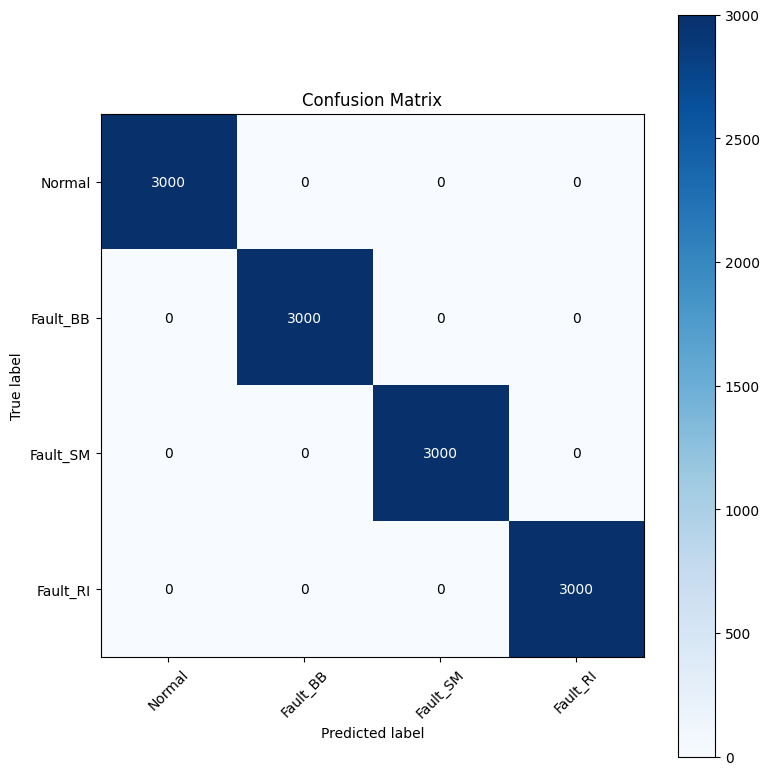

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, ['Normal', 'Fault_BB', 'Fault_SM', 'Fault_RI'], rotation=45)
plt.yticks(tick_marks, ['Normal', 'Fault_BB', 'Fault_SM', 'Fault_RI'])

fmt = 'd'
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], fmt),
             ha="center", va="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()